In [ ]:
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam,Adadelta,Adagrad,SGD,RMSprop
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU {torch.cuda.get_device_name(0)} is available.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU.")

GPU Tesla T4 is available.


In [ ]:
train = datasets.CIFAR10(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 30)


Files already downloaded and verified


In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3,3),padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3),padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, (3,3),padding=1),
            nn.ReLU(),
            nn.Flatten(),
            # nn.Linear(4194304, 100000),
            nn.Linear(131072,10)
        )

    def forward(self, x):
        return self.model(x)
    def reset_parameters(self):
        for layer in self.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()


In [ ]:
clf = ImageClassifier().to('cuda')
# for batch in dataset:
#   x,y=batch
#   print(clf(x))
#   print(y)
#   break
opt1 = Adam(clf.parameters(), lr=1e-3)
# opt2 = Adadelta(clf.parameters(),lr=1e-3)
# opt3 = Adagrad(clf.parameters(), lr=1e-3)
# opt4 = SGD(clf.parameters(), lr=1e-3)
# opt5 = RMSprop(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

1.6655679941177368
1.4742223024368286
0.9684885740280151
0.4591601490974426
0.5393949747085571
0.24826152622699738
0.2497730702161789
0.17593295872211456
0.12458869069814682
0.011076902970671654
2.1971590518951416
2.21822452545166
2.2389211654663086
2.2394816875457764
2.2278921604156494
2.2081856727600098
2.1825695037841797
2.153292417526245
2.122472047805786
2.0921225547790527


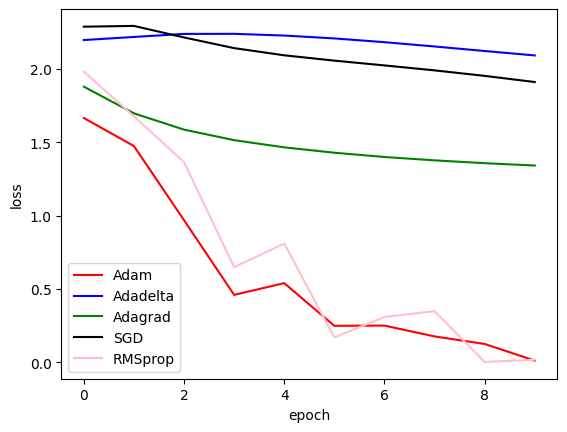

In [ ]:
if __name__ == "__main__":
    epoch_list=[]
    loss_list1=[]
    loss_list2=[]
    loss_list3=[]
    loss_list4=[]
    loss_list5=[]
    #1
    for epoch in range(10): # train for 10 epochs

        for batch in dataset:
            X,y = batch
            X, y = X.to('cuda'), y.to('cuda')
            yhat = clf(X)
            loss = loss_fn(yhat, y)

            # Apply backprop
            opt1.zero_grad()
            loss.backward()
            opt1.step()

        loss_list1.append(loss.item())
        print(loss.item())
        epoch_list.append(epoch)
    #2
    clf = ImageClassifier().to('cuda')
    opt2 = Adadelta(clf.parameters(),lr=1e-3)
    for epoch in range(10): # train for 10 epochs

      for batch in dataset:
          X,y = batch
          X, y = X.to('cuda'), y.to('cuda')
          yhat = clf(X)
          loss = loss_fn(yhat, y)

          # Apply backprop
          opt2.zero_grad()
          loss.backward()
          opt2.step()

      loss_list2.append(loss.item())
      print(loss.item())

    #3
    clf = ImageClassifier().to('cuda')
    opt3 = Adagrad(clf.parameters(), lr=1e-3)
    for epoch in range(10): # train for 10 epochs

      for batch in dataset:
          X,y = batch
          X, y = X.to('cuda'), y.to('cuda')
          yhat = clf(X)
          loss = loss_fn(yhat, y)

          # Apply backprop
          opt3.zero_grad()
          loss.backward()
          opt3.step()

      loss_list3.append(loss.item())

    #4
    clf = ImageClassifier().to('cuda')
    opt4 = SGD(clf.parameters(), lr=1e-3)
    for epoch in range(10): # train for 10 epochs

        for batch in dataset:
            X,y = batch
            X, y = X.to('cuda'), y.to('cuda')
            yhat = clf(X)
            loss = loss_fn(yhat, y)

            # Apply backprop
            opt4.zero_grad()
            loss.backward()
            opt4.step()

        loss_list4.append(loss.item())

    #5
    clf = ImageClassifier().to('cuda')
    opt5 = RMSprop(clf.parameters(), lr=1e-3)
    for epoch in range(10): # train for 10 epochs

        for batch in dataset:
            X,y = batch
            X, y = X.to('cuda'), y.to('cuda')
            yhat = clf(X)
            loss = loss_fn(yhat, y)

            # Apply backprop
            opt5.zero_grad()
            loss.backward()
            opt5.step()

        loss_list5.append(loss.item())
    plt.plot(epoch_list,loss_list1,c='red')
    plt.plot(epoch_list,loss_list2,c='blue')
    plt.plot(epoch_list,loss_list3,c='green')
    plt.plot(epoch_list,loss_list4,c='black')
    plt.plot(epoch_list,loss_list5,c='pink')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Adam','Adadelta','Adagrad','SGD','RMSprop'])
    plt.show()
